In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def style_diag(data):
    '''author: CJR, https://stackoverflow.com/a/56916315'''
    diag_mask = pd.DataFrame("", index=data.index, columns=data.columns)
    min_axis = min(diag_mask.shape)
    diag_mask.iloc[range(min_axis), range(min_axis)] = 'background-color: yellow'
    return diag_mask

# Metric Analysis: Urban/Rural Evaluation

In [10]:
mimer = '/mimer/NOBACKUP/groups/globalpoverty1/albin_and_albin/raw_count_confusion_matrices/dhs_eval/'

pred_vs_dhs_csv = mimer + 'confusion_matrix_esri_pred_vs_dhs_urban_rural_eval_34512.csv'
smod_vs_dhs_csv = mimer + 'confusion_matrix_smod_vs_dhs_urban_rural_eval_34512.csv'

## Prediction vs DHS

### DataFrame (raw pixel count)

In [11]:
df_raw_count = pd.read_csv(pred_vs_dhs_csv, index_col=0)
df_raw_count.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,5876706,21352404
Urban,5737506,73245310


In [12]:
df_raw_count.sum(axis=1)

Rural    27229110
Urban    78982816
dtype: int64

In [13]:
df_new = df_raw_count.sum(axis=1)
df_new = df_new.div(df_new.sum(axis=0), axis=0)
df_new

Rural    0.256366
Urban    0.743634
dtype: float64

# Accuracy

In [14]:
tp = df_raw_count.to_numpy().diagonal().sum()
num_pixels = df_raw_count.to_numpy().sum()
print(f'accuracy: {tp / num_pixels}')

accuracy: 0.7449447437757601


# Recall

### DataFrame (recall)

In [15]:
df_recall = df_raw_count.div(df_raw_count.sum(axis=1), axis=0)
df_recall.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,0.216,0.784
Urban,0.073,0.927


### Seaborn Heatmap (Recall)

Text(0.5, 23.52222222222222, 'Predicted label (prediction)')

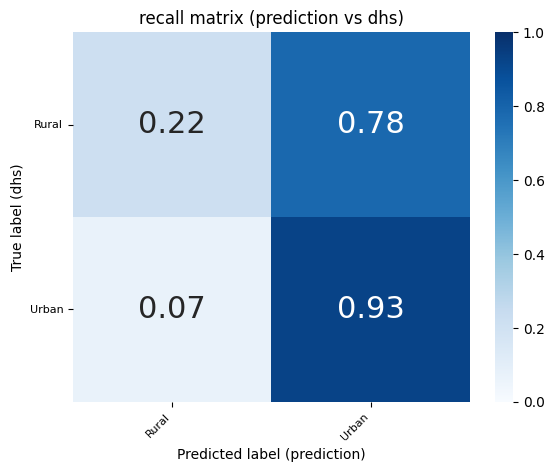

In [16]:
heatmap = sns.heatmap(data=df_recall, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":22.0}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('recall matrix (prediction vs dhs)')
plt.ylabel('True label (dhs)')
plt.xlabel('Predicted label (prediction)')

### Recall score (per class accuracy)

In [17]:
class_names = df_recall.columns
confmat_diag = df_recall.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
recall_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'recall'])
recall_scores = recall_scores.round(3)
print(recall_scores.to_string(index=False))

class  recall
Rural   0.216
Urban   0.927


In [18]:
confmat_diag

array([0.21582439, 0.92735754])

# Precision

### DataFrame (precision)

In [19]:
df_precision = df_raw_count.div(df_raw_count.sum(axis=0), axis=1)
df_precision.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,0.506,0.226
Urban,0.494,0.774


### Seaborn Heatmap (Precision)

Text(0.5, 23.52222222222222, 'Predicted label (prediction)')

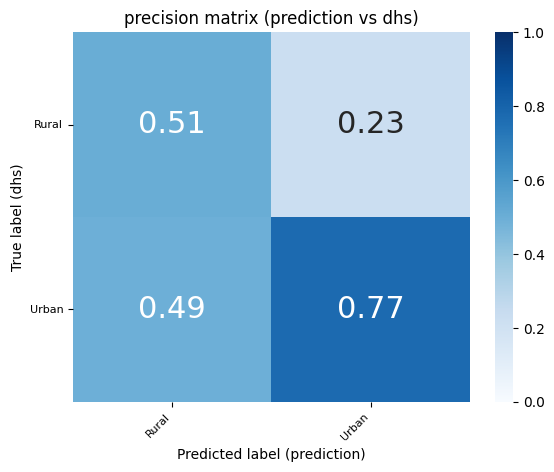

In [20]:
heatmap = sns.heatmap(data=df_precision, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":22.0}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('precision matrix (prediction vs dhs)')
plt.ylabel('True label (dhs)')
plt.xlabel('Predicted label (prediction)')

### Precision score (prediction accuracy)

In [21]:
class_names = df_precision.columns
confmat_diag = df_precision.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
precision_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'precision'])
precision_scores = precision_scores.round(3)
print(precision_scores.to_string(index=False))

class  precision
Rural      0.506
Urban      0.774


In [22]:
confmat_diag

array([0.50599266, 0.77428203])

## SMOD vs DHS

### DataFrame (raw pixel count)

In [23]:
df_raw_count = pd.read_csv(smod_vs_dhs_csv, index_col=0)
df_raw_count.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,5698798,26616304
Urban,3264788,78910237


In [24]:
df_raw_count.sum(axis=1)

Rural    32315102
Urban    82175025
dtype: int64

In [25]:
df_new = df_raw_count.sum(axis=1)
df_new = df_new.div(df_new.sum(axis=0), axis=0)
df_new

Rural    0.282252
Urban    0.717748
dtype: float64

# Accuracy

In [26]:
tp = df_raw_count.to_numpy().diagonal().sum()
num_pixels = df_raw_count.to_numpy().sum()
print(f'accuracy: {tp / num_pixels}')

accuracy: 0.7390072595517341


# Recall

### DataFrame (recall)

In [27]:
df_recall = df_raw_count.div(df_raw_count.sum(axis=1), axis=0)
df_recall.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,0.176,0.824
Urban,0.040,0.960


### Seaborn Heatmap (Recall)

Text(0.5, 23.52222222222222, 'Predicted label (smod)')

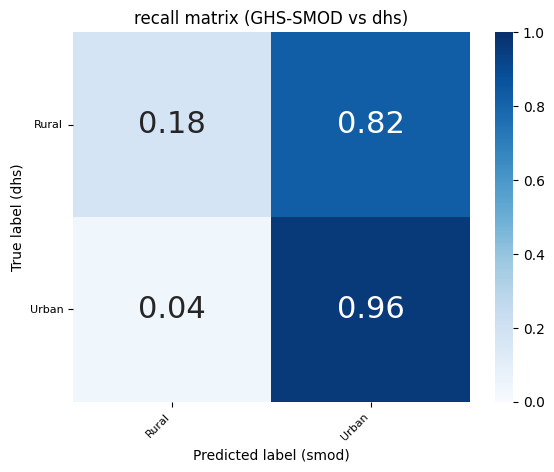

In [28]:
heatmap = sns.heatmap(data=df_recall, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":22.0}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('recall matrix (GHS-SMOD vs dhs)')
plt.ylabel('True label (dhs)')
plt.xlabel('Predicted label (smod)')

### Recall score (per class accuracy)

In [29]:
class_names = df_recall.columns
confmat_diag = df_recall.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
recall_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'recall'])
recall_scores = recall_scores.round(3)
print(recall_scores.to_string(index=False))

class  recall
Rural   0.176
Urban   0.960


In [30]:
confmat_diag

array([0.17635092, 0.96027031])

# Precision

### DataFrame (precision)

In [31]:
df_precision = df_raw_count.div(df_raw_count.sum(axis=0), axis=1)
df_precision.style.apply(style_diag, axis=None).format(precision=3)

,Rural,Urban
Rural,0.636,0.252
Urban,0.364,0.748


### Seaborn Heatmap (Precision)

Text(0.5, 23.52222222222222, 'Predicted label (smod)')

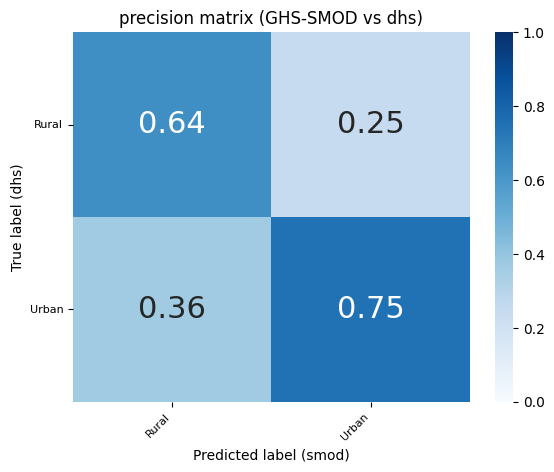

In [32]:
heatmap = sns.heatmap(data=df_precision, vmin=0.0, vmax=1.0, cmap=plt.cm.Blues, annot=True, annot_kws={"fontsize":22.0}, fmt='.2f')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=8)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=8)
plt.title('precision matrix (GHS-SMOD vs dhs)')
plt.ylabel('True label (dhs)')
plt.xlabel('Predicted label (smod)')

### Precision score (prediction accuracy)

In [33]:
class_names = df_precision.columns
confmat_diag = df_precision.to_numpy().diagonal()
per_class_acc = dict(zip(class_names, confmat_diag))
precision_scores = pd.DataFrame(per_class_acc.items(), columns=['class', 'precision'])
precision_scores = precision_scores.round(3)
print(precision_scores.to_string(index=False))

class  precision
Rural      0.636
Urban      0.748


In [34]:
confmat_diag

array([0.63577211, 0.74777621])